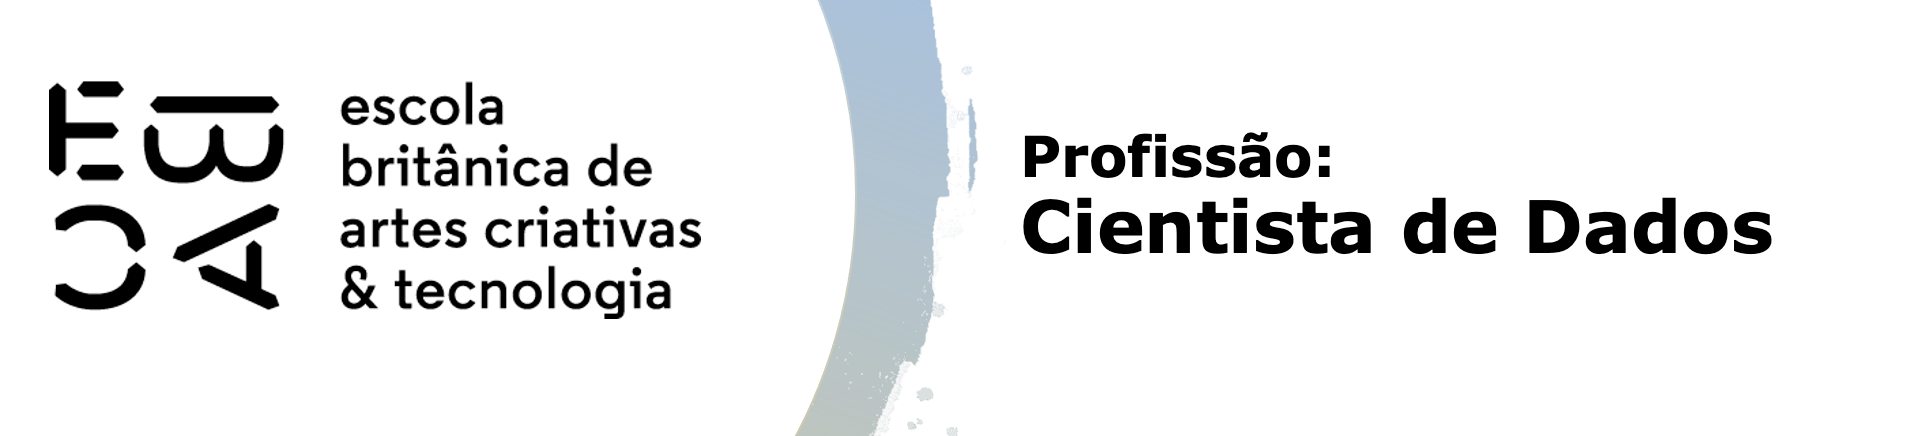

# Tarefa

In [40]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [6]:
pg = sns.load_dataset('penguins')

In [8]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

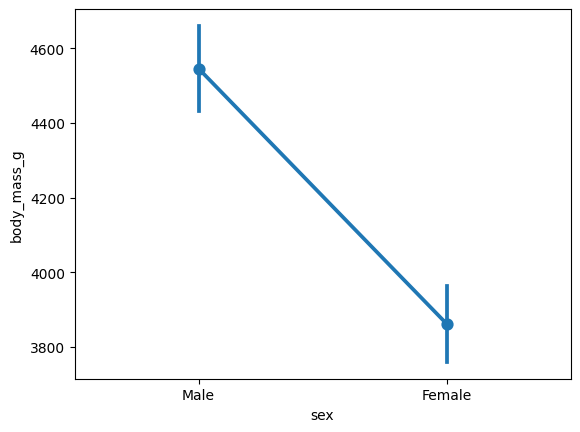

In [10]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [36]:
# Remover valores nulos
pg = pg.dropna(subset=['sex', 'body_mass_g'])

# Separar os pesos dos machos e fêmeas
macho_peso = pg[pg['sex'] == 'Male']['body_mass_g']
femea_peso = pg[pg['sex'] == 'Female']['body_mass_g']

# Realizar o teste T para amostras independentes
stat, p_valor = stats.ttest_ind(macho_peso, femea_peso, equal_var=False)

# Exibir resultados
print(f"Estatística do teste T: {stat:.4f}")
print(f"Valor-p: {p_valor:.4f}")

# Verificar se rejeitamos a hipótese nula
alpha = 0.05
if p_valor < alpha:
    print("Rejeitamos a hipótese nula: Há uma diferença estatisticamente significativa entre os pesos de machos e fêmeas.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não há evidências estatísticas suficientes para afirmar que há diferença de peso entre os sexos.")

Estatística do teste T: 8.5545
Valor-p: 0.0000
Rejeitamos a hipótese nula: Há uma diferença estatisticamente significativa entre os pesos de machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

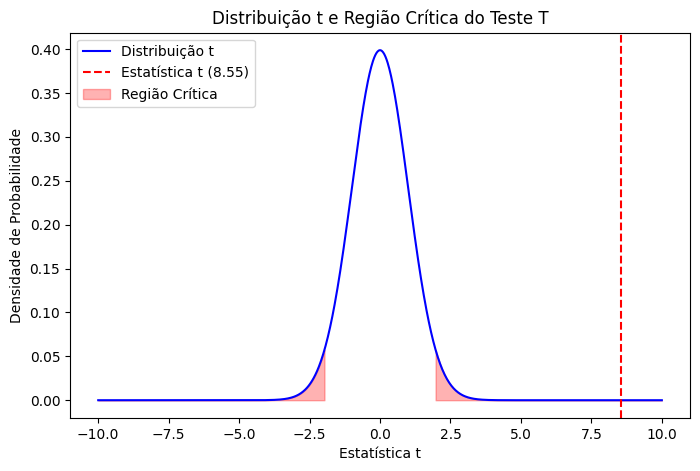

In [44]:
# Ajustando a escala do eixo x para incluir valores maiores
x = np.linspace(-10, 10, 1000)  # Expandimos o intervalo para capturar valores altos de t
y = stats.t.pdf(x, df=len(macho_peso) + len(femea_peso) - 2)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Distribuição t', color='blue')
plt.axvline(stat, color='red', linestyle='dashed', label=f'Estatística t ({stat:.2f})')
plt.fill_between(x, y, where=(x >= stats.t.ppf(1-alpha/2, df=len(macho_peso) + len(femea_peso) - 2)), color='red', alpha=0.3, label='Região Crítica')
plt.fill_between(x, y, where=(x <= stats.t.ppf(alpha/2, df=len(macho_peso) + len(femea_peso) - 2)), color='red', alpha=0.3)
plt.legend()
plt.title("Distribuição t e Região Crítica do Teste T")
plt.xlabel("Estatística t")
plt.ylabel("Densidade de Probabilidade")
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

Espécie: Adelie | Estatística do teste T: 13.1263 | Valor-p: 0.0000
Espécie: Chinstrap | Estatística do teste T: 5.2077 | Valor-p: 0.0000
Espécie: Gentoo | Estatística do teste T: 14.7614 | Valor-p: 0.0000


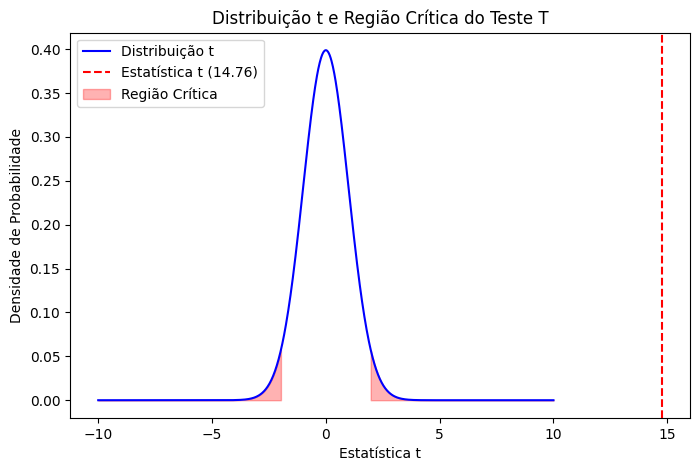

In [46]:
# Remover valores nulos
pg = pg.dropna(subset=['sex', 'body_mass_g', 'species'])

# Lista para armazenar os resultados
resultados = []

# Realizar o teste T para cada espécie
for especie in pg['species'].unique():
    dados_especie = pg[pg['species'] == especie]
    macho_peso = dados_especie[dados_especie['sex'] == 'Male']['body_mass_g']
    femea_peso = dados_especie[dados_especie['sex'] == 'Female']['body_mass_g']
    
    if len(macho_peso) > 1 and len(femea_peso) > 1:  # Verifica se há dados suficientes
        stat, p_valor = stats.ttest_ind(macho_peso, femea_peso, equal_var=False)
        resultados.append((especie, stat, p_valor))
        print(f"Espécie: {especie} | Estatística do teste T: {stat:.4f} | Valor-p: {p_valor:.4f}")
    else:
        print(f"Espécie: {especie} | Dados insuficientes para realizar o teste T.")

# Ajustando a escala do eixo x para incluir valores maiores
x = np.linspace(-10, 10, 1000)
y = stats.t.pdf(x, df=len(pg) - 2)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Distribuição t', color='blue')
plt.axvline(stat, color='red', linestyle='dashed', label=f'Estatística t ({stat:.2f})')
plt.fill_between(x, y, where=(x >= stats.t.ppf(1-0.05/2, df=len(pg) - 2)), color='red', alpha=0.3, label='Região Crítica')
plt.fill_between(x, y, where=(x <= stats.t.ppf(0.05/2, df=len(pg) - 2)), color='red', alpha=0.3)
plt.legend()
plt.title("Distribuição t e Região Crítica do Teste T")
plt.xlabel("Estatística t")
plt.ylabel("Densidade de Probabilidade")
plt.show()

## Análise do Teste T por Espécie de Pinguim

### 1. Resultado do Teste T
Os resultados mostram **valores de estatística t extremamente altos e um valor-p igual a 0**, indicando que há uma diferença **altamente significativa** entre o peso dos machos e das fêmeas para todas as espécies analisadas.

#### Valores obtidos:
- **Adelie** → Estatística t = 13.13 | p-valor = 0.0000
- **Chinstrap** → Estatística t = 5.21 | p-valor = 0.0000
- **Gentoo** → Estatística t = 14.76 | p-valor = 0.0000

### 2. Por que isso aconteceu?
1. **Diferença extrema nas médias**
   - A diferença entre os pesos médios de machos e fêmeas é grande, aumentando o valor da estatística t.
   
2. **Baixa variabilidade dentro de cada grupo**
   - Se os pesos dos machos e fêmeas forem **relativamente estáveis dentro de cada grupo**, a estatística t fica ainda maior.

3. **Tamanho da amostra**
   - Quanto maior a amostra, maior o poder estatístico do teste, reduzindo ainda mais o valor-p.

4. **O valor-p realmente é zero?**
   - Não literalmente. Ele é **tão pequeno** que o computador representa como 0.0000, indicando uma chance praticamente nula de essa diferença ser mero acaso.

### 3. O que o gráfico mostra?
- A curva azul representa a **distribuição t sob a hipótese nula**.
- A linha vermelha pontilhada mostra o **valor da estatística t observada**, que está muito distante da distribuição.
- As áreas vermelhas são **as regiões críticas** (se t estiver nelas, rejeitamos \(H_0\)).
- Como a estatística t está muito além do esperado, rejeitamos fortemente a hipótese nula.

### 4. Conclusão
- O peso dos machos e fêmeas é **estatisticamente diferente** em todas as espécies analisadas.
- A estatística t ficou **muito além da distribuição esperada**, gerando um valor-p praticamente zero.
- O gráfico mostra que a estatística t está **completamente fora da curva principal**, confirmando que a diferença é muito forte.
"""